# Final Ex | 40710 | Doron Raanan | 314781998

### During this exercise I will try to examine whether the percentage of areas in the neighborhood allocated to green areas affects the price of properties in general and the rate of increase in prices in particular.

#### When plotting please change the path to the path  where you want to save your files 

#### Please upload the provided data files to the same folder as the notebook (The files are inside folders- upload all files inside each folder)

## Packages and Settings 

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import geopandas as gpd
from os import listdir
import pyproj
from shapely.geometry import Point
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import json

## Importing the data

###### Now I will load the data which is currently csv or shp into geo/dataframes

### importing the sales data

In [2]:
sales = pd.read_csv('AssetsDealsTLV20122017.csv', # name of the csv
                    index_col=0) # Column to use as the row labels of the DataFrame

### Importing city data 

###### note to self - send this data with the project

In [3]:
### This shp files are extracted from Tel Aviv`s GIS website
##Neighbourhoods - This data includes Tel Aviv`s Neighbourhoods boundaries, Geodata as polygons 
NBHD = gpd.read_file('Neighbourhoods.shp')
#Green - This file includes data on Green areas and public parks in Tel Aviv, Geodata as polygons  
Green = gpd.read_file(r'Green/Green Areas and Public Parks.shp')

## Exploring the data

### for each dataframe Showing the data`s head (first 5 rows) to see a preview

In [4]:
sales.head()

,Deals_DealDate,Deals_DealAmount,Deals_YearBuilt,Assets_BuildingFloors,Assets_SettlmentID,Assets_SettlementNameHeb,Assets_SettlementNameEng,Assets_FloorNo,Assets_AssetArea,Assets_X_RECOMMENDED,Assets_Y_RECOMMENDED,HUJIUnite
OBJECTID,,,,,,,,,,,,
1,29/04/2013 0:00:00,1100000.0,1977.0,4.0,5000.0,תל אביב -יפו,TEL AVIV - YAFO,שניה,81.26,176488.0000,659754.0000,50000736.0
2,23/02/2016 0:00:00,1040000.0,1976.0,4.0,5000.0,תל אביב -יפו,TEL AVIV - YAFO,ראשונה,76.97,176512.0000,659755.0000,50000736.0
3,04/12/2014 0:00:00,378700.0,1960.0,4.0,5000.0,תל אביב -יפו,TEL AVIV - YAFO,שניה,61.46,176465.8868,659765.2835,50000736.0
4,24/02/2014 0:00:00,950000.0,1970.0,4.0,5000.0,תל אביב -יפו,TEL AVIV - YAFO,ראשונה,64.90,176502.0882,659782.1090,50000736.0
5,10/05/2017 0:00:00,1300000.0,1970.0,4.0,5000.0,תל אביב -יפו,TEL AVIV - YAFO,שניה,76.52,176502.0882,659782.1090,50000736.0


In [5]:
Green.head()

,oidshetach,msshefa,shemgan,suggan,shemgantaz,swnagish,dateimport,msarea,UniqueId,geometry
0,1.0,3123.0,חוף הצוק,5,פס ירק,0.0,15/06/2021 01:26:06,331.30,842-1,"POLYGON ((180535.688 672516.007, 180521.140 67..."
1,2.0,3123.0,חוף הצוק,5,פס ירק,0.0,15/06/2021 01:26:06,4397.82,842-2,"POLYGON ((180511.319 672415.815, 180511.536 67..."
2,3.0,977.0,חוף הצוק,8,חוף,0.0,15/06/2021 01:26:06,168.71,842-3,"POLYGON ((180524.095 672488.975, 180514.094 67..."
3,4.0,3123.0,חוף הצוק,5,פס ירק,0.0,15/06/2021 01:26:06,316.54,842-4,"POLYGON ((180512.048 672448.086, 180502.955 67..."
4,5.0,3123.0,חוף הצוק,5,פס ירק,0.0,15/06/2021 01:26:06,457.36,842-5,"POLYGON ((180511.319 672415.815, 180510.968 67..."


In [6]:
NBHD.head()

,oidshchuna,msshchuna,dateimport,ShapeArea,shemshchun,UniqueId,geometry
0,1.0,3.0,14/10/2020 04:02:01,1.307955e+06,אזור שדה דב,511-1,"POLYGON ((180194.786 670106.559, 180194.277 67..."
1,2.0,2.0,14/10/2020 04:02:01,1.288925e+06,צוקי אביב,511-2,"POLYGON ((180938.798 670850.278, 180901.843 67..."
2,3.0,7.0,14/10/2020 04:02:01,1.101582e+06,'רמת אביב ג,511-3,"POLYGON ((182099.846 670660.108, 182107.940 67..."
3,4.0,11.0,14/10/2020 04:02:01,1.459851e+06,"אוניברסיטת ת""א",511-4,"POLYGON ((181510.362 669481.235, 181513.748 66..."
4,5.0,6.0,14/10/2020 04:02:01,4.212298e+05,כוכב הצפון,511-5,"POLYGON ((179724.726 667333.924, 179721.910 66..."


## Preliminary information processing

### Working on Green

#### Fixing invalid data

##### get a list of all invalid polygons 

In [7]:
Green[Green.is_valid== False] # get only those polygons where is_valid function yields false 

,oidshetach,msshefa,shemgan,suggan,shemgantaz,swnagish,dateimport,msarea,UniqueId,geometry
26,31.0,380.0,רוזין,1,גן,0.0,15/06/2021 01:26:06,670.42,842-31,"POLYGON ((181651.706 670354.501, 181650.610 67..."
78,102.0,2825.0,פארק הירקון,1,גן,0.0,15/06/2021 01:26:06,66197.85,842-102,"POLYGON ((179895.375 666986.334, 179885.455 66..."
157,238.0,392.0,רפידים מאחורי 6-8,4,חורשה,0.0,15/06/2021 01:26:06,21387.52,842-238,"POLYGON ((182637.762 668607.075, 182675.551 66..."
159,243.0,424.0,בני אפרים וחורשת שטרית,4,חורשה,0.0,15/06/2021 01:26:06,20017.59,842-243,"POLYGON ((182716.112 668335.418, 182715.308 66..."
163,247.0,2236.0,ולנברג ראול - פארק,1,גן,0.0,15/06/2021 01:26:06,10663.39,842-247,"POLYGON ((184180.373 668452.128, 184157.330 66..."
193,286.0,2825.0,פארק הירקון,1,גן,0.0,15/06/2021 01:26:06,75055.87,842-286,"POLYGON ((183200.440 667800.058, 183179.932 66..."
215,315.0,2825.0,פארק הירקון,1,גן,0.0,15/06/2021 01:26:06,8038.31,842-315,"POLYGON ((181496.040 667490.890, 181473.824 66..."
234,335.0,2825.0,פארק הירקון,1,גן,0.0,15/06/2021 01:26:06,14697.40,842-335,"POLYGON ((180701.165 667257.711, 180695.840 66..."
250,353.0,2825.0,פארק הירקון,1,גן,0.0,15/06/2021 01:26:06,7603.70,842-353,"POLYGON ((180200.153 667244.913, 180199.091 66..."
251,354.0,2825.0,פארק הירקון,1,גן,0.0,15/06/2021 01:26:06,12160.82,842-354,"POLYGON ((181632.733 667124.227, 181612.405 66..."


In [8]:
Green['valid'] = Green.is_valid # add a column  stating whether the polygon is valid 
Green # now there is a new column added stating whether the polygon is valid

,oidshetach,msshefa,shemgan,suggan,shemgantaz,swnagish,dateimport,msarea,UniqueId,geometry,valid
0,1.0,3123.0,חוף הצוק,5,פס ירק,0.0,15/06/2021 01:26:06,331.30,842-1,"POLYGON ((180535.688 672516.007, 180521.140 67...",True
1,2.0,3123.0,חוף הצוק,5,פס ירק,0.0,15/06/2021 01:26:06,4397.82,842-2,"POLYGON ((180511.319 672415.815, 180511.536 67...",True
2,3.0,977.0,חוף הצוק,8,חוף,0.0,15/06/2021 01:26:06,168.71,842-3,"POLYGON ((180524.095 672488.975, 180514.094 67...",True
3,4.0,3123.0,חוף הצוק,5,פס ירק,0.0,15/06/2021 01:26:06,316.54,842-4,"POLYGON ((180512.048 672448.086, 180502.955 67...",True
4,5.0,3123.0,חוף הצוק,5,פס ירק,0.0,15/06/2021 01:26:06,457.36,842-5,"POLYGON ((180511.319 672415.815, 180510.968 67...",True
...,...,...,...,...,...,...,...,...,...,...,...
2277,2731.0,6862.0,הבלונים,1,גן,0.0,15/06/2021 01:26:06,289.34,842-2731,"POLYGON ((180997.079 661305.020, 181037.878 66...",True
2278,2732.0,6862.0,הבלונים,1,גן,0.0,15/06/2021 01:26:06,174.41,842-2732,"POLYGON ((181055.817 661306.767, 181054.547 66...",True
2279,2733.0,6862.0,הבלונים,1,גן,0.0,15/06/2021 01:26:06,576.88,842-2733,"POLYGON ((181147.098 661526.249, 181146.040 66...",True
2280,2734.0,6862.0,הבלונים,1,גן,0.0,15/06/2021 01:26:06,288.71,842-2734,"POLYGON ((181066.136 661282.832, 181069.840 66...",True


##### Trying to understand why polygons are invalid - looking at park hayarkon

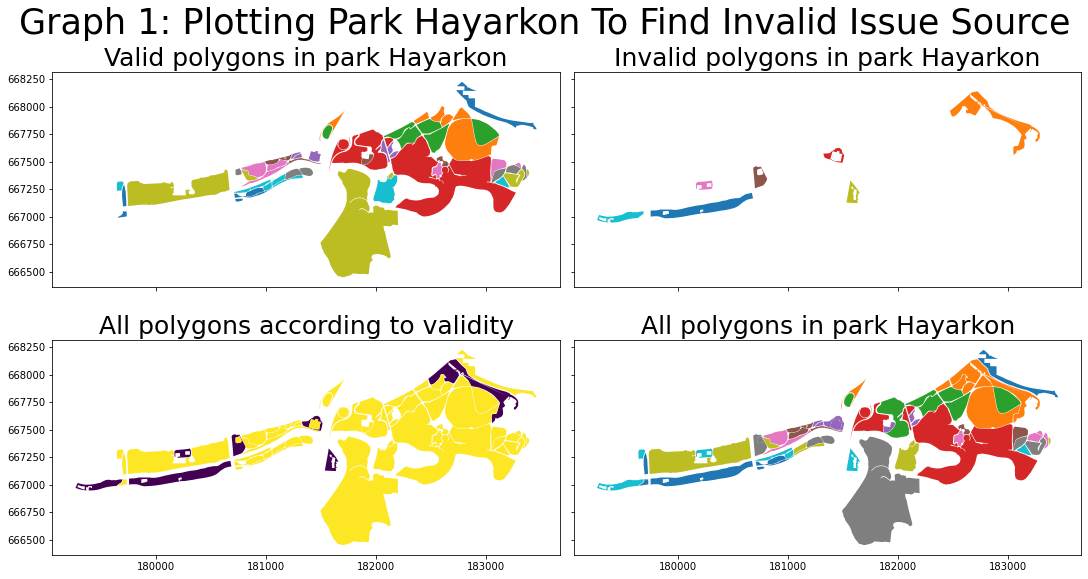

In [9]:
# creating a 2 on 2 figure on which I will draw valid and invalid polygons 
# the axes on the figure will share x and y and will be on a constrained layout
# figure size will be 15,8
fig, ax = plt.subplots(2,2, figsize = (15,8), sharex=True, sharey=True, constrained_layout=True)

#setting main title and size for the figure
fig.suptitle('Graph 1: Plotting Park Hayarkon To Find Invalid Issue Source', fontsize=35) 

# drawing all valid polygons in park hayarkon, each in a diffrent color
#in unordered color scheme to see the difference between each other
Green[(Green.shemgan== 'פארק הירקון') & (Green.is_valid== True)].plot(column='UniqueId', ax= ax[0, 0])
ax[0, 0].set_title('Valid polygons in park Hayarkon', size = 25) # setting a title and size 

# drawing all invalid polygons in park hayarkon, in unordered color scheme to see the diffrence between each other
Green[(Green.shemgan== 'פארק הירקון') & (Green.is_valid== False)].plot(column='UniqueId', ax= ax[0,1])
ax[0,1].set_title('Invalid polygons in park Hayarkon', size = 25)# setting a title and size 

# drawing all  polygons in park hayarkon, in unordered color scheme to see the diffrence between each other
Green[(Green.shemgan== 'פארק הירקון')].plot(column='UniqueId', ax= ax[1,1])
ax[1,1].set_title('All polygons in park Hayarkon', size = 25)# setting a title and size 

# drawing all polygons in park hayarkon, colored by vaility
Green[(Green.shemgan== 'פארק הירקון')].plot(column='valid', ax= ax[1, 0])
ax[1,0].set_title('All polygons according to validity', size = 25)# setting a title and size 


# save with dpi 150 
fig.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\Hayarkon_invalid_issue_source.png', dpi=150)

###### here we can see that at least some of the polygons are diffrent from the valid polygons by having holes in them

##### I will try to fix the polygons with buffer(0) method

In [10]:
Green.geometry = Green.geometry.buffer(0)

##### Checking the validity of the data now

In [11]:
Green[Green.is_valid== False] # only get those polygons where is_valid function yields false

,oidshetach,msshefa,shemgan,suggan,shemgantaz,swnagish,dateimport,msarea,UniqueId,geometry,valid


##### Green data is valid now 

In [12]:
# re-saving green with 'valid' droped because it's irrelevant now that evreything is valid
Green = Green.drop(columns = 'valid')

####  projections 

In [13]:
# chcking if projections are the same on both layers so that geographical processing between them will be correct 
print(NBHD.crs) # projection on NBHD 
print(Green.crs) # projection on Green
print(Green.crs == NBHD.crs) # are they the same ? 

epsg:2039
epsg:2039
True


### Inital work on data - Sales 

#### price per meter 

In [14]:
# calculating the price per area for each assest
sales['pricepermeter'] = (sales['Deals_DealAmount']) /  sales['Assets_AssetArea'] 
# doing this in order to work on normalized data 

#### Geodataframe

In [15]:
type(sales) # data is a dataframe and not geodataframe

pandas.core.frame.DataFrame

##### Converting into Geodataframe

In [16]:
#list of all points as a point shape
geometry = [Point(xy) for xy in zip(sales.Assets_X_RECOMMENDED, sales.Assets_Y_RECOMMENDED)]
# the correct projection as checked earlier (same as the other dataset)
crs = ('epsg:2039') 
# creating a geodataframe with the new points and the correct projection 
geo_sales = gpd.GeoDataFrame(sales, crs=crs, geometry=geometry) 

###### making sure that evreything went correctly

In [17]:
geo_sales.head() # we have a new geometry column

,Deals_DealDate,Deals_DealAmount,Deals_YearBuilt,Assets_BuildingFloors,Assets_SettlmentID,Assets_SettlementNameHeb,Assets_SettlementNameEng,Assets_FloorNo,Assets_AssetArea,Assets_X_RECOMMENDED,Assets_Y_RECOMMENDED,HUJIUnite,pricepermeter,geometry
OBJECTID,,,,,,,,,,,,,,
1,29/04/2013 0:00:00,1100000.0,1977.0,4.0,5000.0,תל אביב -יפו,TEL AVIV - YAFO,שניה,81.26,176488.0000,659754.0000,50000736.0,13536.795471,POINT (176488.000 659754.000)
2,23/02/2016 0:00:00,1040000.0,1976.0,4.0,5000.0,תל אביב -יפו,TEL AVIV - YAFO,ראשונה,76.97,176512.0000,659755.0000,50000736.0,13511.757828,POINT (176512.000 659755.000)
3,04/12/2014 0:00:00,378700.0,1960.0,4.0,5000.0,תל אביב -יפו,TEL AVIV - YAFO,שניה,61.46,176465.8868,659765.2835,50000736.0,6161.731207,POINT (176465.887 659765.284)
4,24/02/2014 0:00:00,950000.0,1970.0,4.0,5000.0,תל אביב -יפו,TEL AVIV - YAFO,ראשונה,64.90,176502.0882,659782.1090,50000736.0,14637.904468,POINT (176502.088 659782.109)
5,10/05/2017 0:00:00,1300000.0,1970.0,4.0,5000.0,תל אביב -יפו,TEL AVIV - YAFO,שניה,76.52,176502.0882,659782.1090,50000736.0,16989.022478,POINT (176502.088 659782.109)


In [18]:
type(geo_sales) # this is a geodataframe

geopandas.geodataframe.GeoDataFrame

In [19]:
geo_sales.crs # correct projection

<Projected CRS: EPSG:2039>
Name: Israel 1993 / Israeli TM Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Israel - onshore; Palestine Territory - onshore.
- bounds: (34.17, 29.45, 35.69, 33.28)
Coordinate Operation:
- name: Israeli TM
- method: Transverse Mercator
Datum: Israel 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
geo_sales[geo_sales.is_valid==False] # all data is valid 

,Deals_DealDate,Deals_DealAmount,Deals_YearBuilt,Assets_BuildingFloors,Assets_SettlmentID,Assets_SettlementNameHeb,Assets_SettlementNameEng,Assets_FloorNo,Assets_AssetArea,Assets_X_RECOMMENDED,Assets_Y_RECOMMENDED,HUJIUnite,pricepermeter,geometry
OBJECTID,,,,,,,,,,,,,,


#### Adding a year to the data

In [21]:
geo_sales['Deals_DealDate'] = pd.to_datetime(geo_sales['Deals_DealDate']) # converting date into datetime type 

##### getting only the year into a new column

In [22]:
# new column on the dataframe called year will be equal to datetime series year attribute type has a year attribute
geo_sales['Year'] = geo_sales['Deals_DealDate'].apply(lambda x: x.year) # datetime type has a year attribute
#this will be usefull later

#### Cleaning the geo_sales data

##### checking if all columns are relevent

In [23]:
geo_sales.columns # a list of all the columns 

Index(['Deals_DealDate', 'Deals_DealAmount', 'Deals_YearBuilt',
       'Assets_BuildingFloors', 'Assets_SettlmentID',
       'Assets_SettlementNameHeb', 'Assets_SettlementNameEng',
       'Assets_FloorNo', 'Assets_AssetArea', 'Assets_X_RECOMMENDED',
       'Assets_Y_RECOMMENDED', 'HUJIUnite', 'pricepermeter', 'geometry',
       'Year'],
      dtype='object')

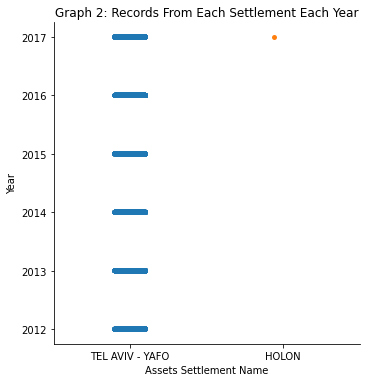

In [24]:
# Trying to understand why is there a "Assets_SettlementNameEng" column and how often and when its being used 
Settl = sns.catplot(x="Assets_SettlementNameEng", y="Year", data=geo_sales) # plotting the data
#setting titles 
Settl.set(
    title ="Graph 2: Records From Each Settlement Each Year",
    xlabel= 'Assets Settlement Name',
    ylabel='Year' ) 
#save fig as png 
Settl.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\settel.png', dpi=150 ) 

In [25]:
list_to_drop= ['Deals_DealDate', # only care about the year 
               'Assets_SettlmentID', # its all in Tel aviv
               'Assets_SettlementNameHeb', # all in Tel aviv
               'Assets_SettlementNameEng', # all in Tel aviv
               'Assets_X_RECOMMENDED', #already used in geometry
               'Assets_Y_RECOMMENDED', # already used in geometry
               'HUJIUnite' # irrelevent
                                 ]

In [26]:
geo_sales = geo_sales.drop(columns=list_to_drop) # drop those irrelvent columns

In [27]:
geo_sales.head() # see the new head 

,Deals_DealAmount,Deals_YearBuilt,Assets_BuildingFloors,Assets_FloorNo,Assets_AssetArea,pricepermeter,geometry,Year
OBJECTID,,,,,,,,
1,1100000.0,1977.0,4.0,שניה,81.26,13536.795471,POINT (176488.000 659754.000),2013
2,1040000.0,1976.0,4.0,ראשונה,76.97,13511.757828,POINT (176512.000 659755.000),2016
3,378700.0,1960.0,4.0,שניה,61.46,6161.731207,POINT (176465.887 659765.284),2014
4,950000.0,1970.0,4.0,ראשונה,64.90,14637.904468,POINT (176502.088 659782.109),2014
5,1300000.0,1970.0,4.0,שניה,76.52,16989.022478,POINT (176502.088 659782.109),2017


## Green area by neighborhood

#### for each green area check within which neighbourhoods is it and state it. If needed dived the green area into few neighbourhoods

In [28]:
GreenNBHD = gpd.overlay(NBHD, Green, how='intersection')

###  Validating the overlay 

#### make sure that overlay divded it by neighbourhood - plot

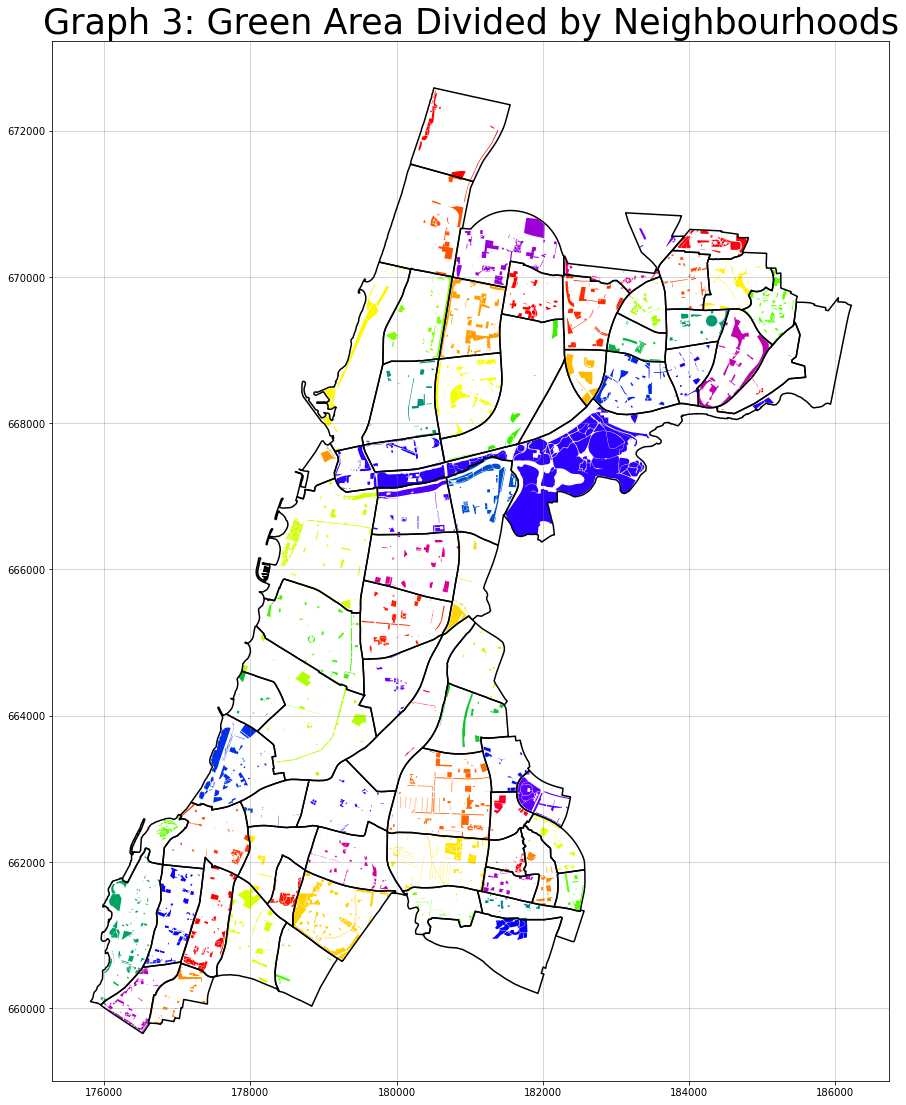

In [29]:
fig, ax = plt.subplots(1,1, figsize = (15,20)) #  subplots = 1 on 1 matrix of axes, figsize 15*20 

ax.set_title('Graph 3: Green Area Divided by Neighbourhoods', size = 35) # set axes title and size
ax.set(facecolor = "white") # white background 
ax.grid(0.7, color= "gray", alpha= 0.4) # setting grid 
NBHD.boundary.plot(ax= ax,  edgecolor='black') # show the neighbourhoods boundray
GreenNBHD.plot(ax= ax,column = 'msshchuna', cmap = "prism") # plot each greenarea by the color of the neighbourhood its in
# This way we will see if those grean areas on that are split between neighbourhoods were split during overlay
# save
fig.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\Green_area_neighbourhoods.png', dpi=150)

#### here we can see that each new green area got the relvent neighbourhood and was divded if needed

### Area 

##### check if they contain the same sum of area 

In [30]:
eacheck  = Green.area.sum() - GreenNBHD.area.sum() #sum of green minus sum of GreenNBHD

In [31]:
eacheck # There are some missing areas 

44693.667826447636

### Unique Id check

##### check if all green unique Id that exists in Green also exist in GreenNBHD

In [32]:
GreenIdscheck = Green.loc[~Green['UniqueId'].isin(GreenNBHD['UniqueId_2'])] 
# GreenIdscheck is a dataframs containing ids which are on Green but not in the new dataframe GreenNBHD

In [33]:
GreenIdscheck

,oidshetach,msshefa,shemgan,suggan,shemgantaz,swnagish,dateimport,msarea,UniqueId,geometry
640,923.0,203.0,ככרות שביט,3,גינה,0.0,15/06/2021 01:26:06,0.00,842-923,POLYGON EMPTY
778,1068.0,1754.0,פורר אליענה,3,גינה,0.0,15/06/2021 01:26:06,0.00,842-1068,POLYGON EMPTY
794,1084.0,1812.0,שמגר,3,גינה,0.0,15/06/2021 01:26:06,0.00,842-1084,POLYGON EMPTY
1094,1441.0,834.0,סנה משה צפון + דרום,5,פס ירק,0.0,15/06/2021 01:26:06,59.46,842-1441,"POLYGON ((183956.168 670611.570, 183959.907 67..."
1228,1598.0,841.0,גשר שיפמן,5,פס ירק,0.0,15/06/2021 01:26:06,539.27,842-1598,"POLYGON ((181094.021 665289.696, 181155.108 66..."
1229,1599.0,841.0,גשר שיפמן,5,פס ירק,0.0,15/06/2021 01:26:06,449.63,842-1599,"POLYGON ((181084.348 665275.952, 181150.526 66..."
1479,1879.0,2831.0,מעפילי אגוז 5 7,14,חורשה זמנית,0.0,15/06/2021 01:26:06,0.00,842-1879,POLYGON EMPTY
1484,1884.0,2838.0,הבושם 6 3,14,חורשה זמנית,0.0,15/06/2021 01:26:06,0.00,842-1884,POLYGON EMPTY
1501,1901.0,2912.0,הכובשים 2 5,14,חורשה זמנית,0.0,15/06/2021 01:26:06,0.00,842-1901,POLYGON EMPTY
1581,1986.0,3092.0,נתן - רחבה,5,פס ירק,0.0,15/06/2021 01:26:06,0.00,842-1986,POLYGON EMPTY


#### We can see that there are some polygons which exist in Green and not in GreenNBHD and that some of them are empty

In [34]:
GreenIdscheck.area.sum() # those that are not empty explain at least some of the missing area

19277.229906997152

##### Plotting the polygons in order to understand why they dont exist in the new dataframe 

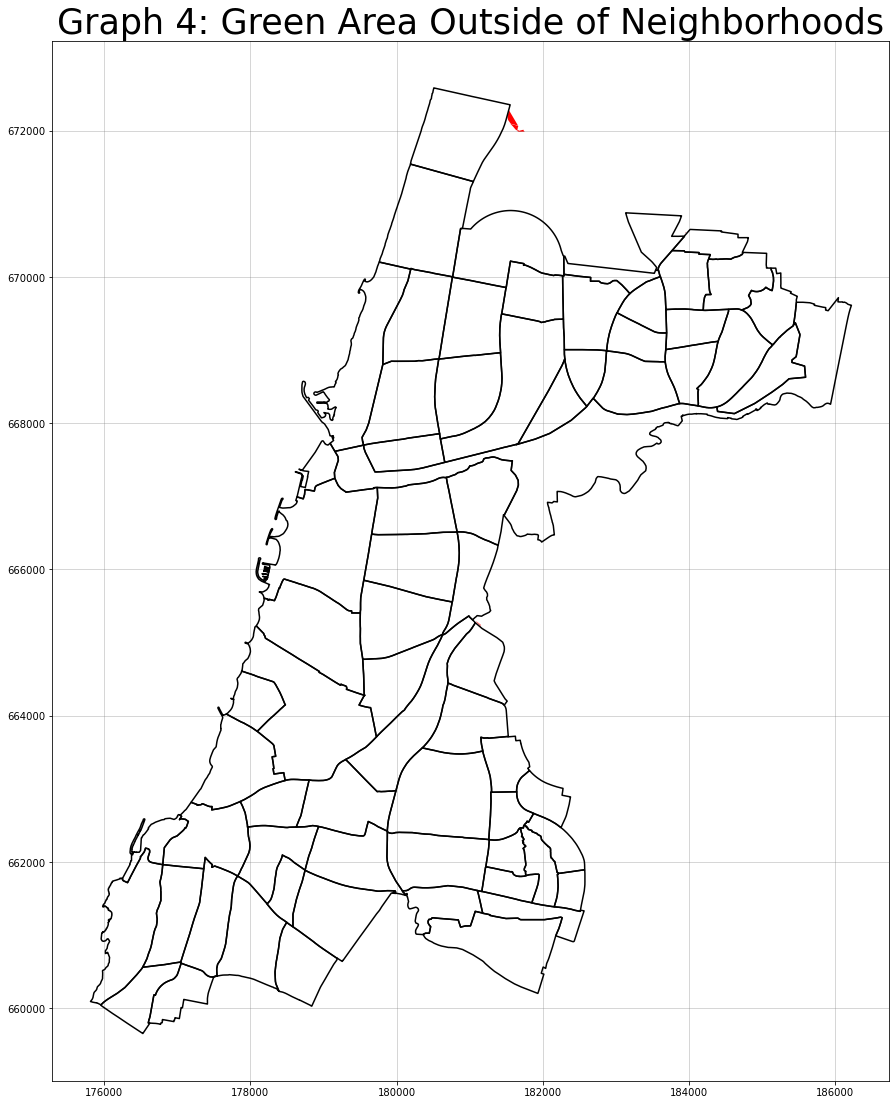

In [35]:
fig, ax = plt.subplots(1,1, figsize = (15,20)) #  subplots = 1 on 1 matrix of axes, figsize 15* 20 , call axis ax 

#Plot neighbourhoods boundary
NBHD.boundary.plot(ax= ax,  edgecolor='black')

# Plot those green areas that do not exist in our new dataframe GreenNBHD
GreenIdscheck.plot(ax=ax, 
            color = 'red')

ax.set_title('Graph 4: Green Area Outside of Neighborhoods', size = 35) # setting title and textsize
ax.set(facecolor = "white") # set background
ax.grid(0.7, color= "gray", alpha= 0.4) # setgrid

fig.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\FreenoutsideNBHD.png', dpi=150) # save 

###### Here we can see that the polgons that didnt overlay are just outside the city boundreys 

### Total Green Area By msshchuna(neighbourhoods) - grouping

In [36]:
GreenNBHD['Garea'] = GreenNBHD.area # set a new column with the green area

###### getting this into a Geojson

In [37]:
GreenNBHD.to_file("GreenNBHD.json", driver="GeoJSON") 

In [38]:
summery = GreenNBHD.groupby('msshchuna').sum('Garea') # sum the Garea by neighbourhoods

In [39]:
summery # each msshchuna got its relevent sum of green area value

,oidshchuna,ShapeArea,oidshetach,msshefa,swnagish,msarea,Garea
msshchuna,,,,,,,
1.0,703.0,2.119694e+07,10164.0,51154.0,0.0,62537.56,51493.895582
2.0,46.0,2.964527e+07,45704.0,46824.0,6.0,99087.60,78270.443136
3.0,24.0,3.139093e+07,50872.0,74782.0,0.0,124046.10,118806.479685
4.0,162.0,1.562315e+07,30814.0,42852.0,0.0,62382.13,62382.135548
5.0,230.0,2.108457e+07,37455.0,56395.0,2.0,41538.27,41096.107145
...,...,...,...,...,...,...,...
67.0,1392.0,7.347063e+06,51245.0,53434.0,0.0,26874.43,26874.446610
68.0,1034.0,5.277126e+06,51381.0,28820.0,8.0,12563.33,12581.951393
69.0,1058.0,7.608314e+06,36638.0,42807.0,1.0,33013.07,32936.869753


### Merging

#### merging stat data with NBHD in order to get the statistics and the geodata on the same table

In [40]:
AreaStat= NBHD.merge(summery, on = 'msshchuna')

### Normlizing the greenarea sum

In [41]:
AreaStat['Narea']= AreaStat.area # getting each neighbourhoods' area 

#### normelize the green area with the normal area

In [42]:
AreaStat['greenAreaInNBHD'] = (AreaStat.Garea / AreaStat.Narea) *100  # normelized green area by neighbourhood area

###### check if any is bigger than 100 because thats not possible

In [43]:
AreaStat[AreaStat.greenAreaInNBHD > 100 ] 

,oidshchuna_x,msshchuna,dateimport,ShapeArea_x,shemshchun,UniqueId,geometry,oidshchuna_y,ShapeArea_y,oidshetach,msshefa,swnagish,msarea,Garea,Narea,greenAreaInNBHD


### Ploting 

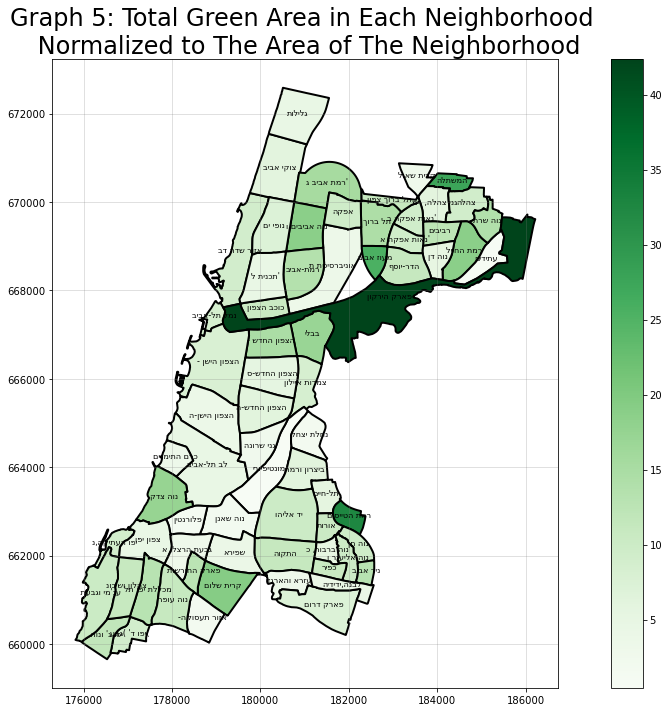

In [44]:
# now I will plot each neighbourhood by its normalizd green value 

fig, ax = plt.subplots(1, figsize = (15,10)) #  subplots = 1 on 1 matrix of axes, figsize 10* 15, call axis ax 

#getting the neighbourhood name on the polygon
AreaStat.apply(lambda x: ax.annotate(text=x.shemshchun[11::-1], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, color= 'black'),axis=1)

#Plot AreaStat colored by greenAreaInNBHD 
AreaStat.plot(ax= ax, 
              column = 'greenAreaInNBHD', 
              cmap = 'Greens',  edgecolor='black', 
              legend = True, linewidth=2)

#setting a title 
ax.set_title('Graph 5: Total Green Area in Each Neighborhood \n Normalized to The Area of The Neighborhood', size = 24)
# creating a grid
plt.grid( color='grey',  alpha=0.3)
# fitting the page 
plt.tight_layout()

# save
fig.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\total_green_area_neighborhood_normalized.png', dpi=150)

## Cleaning the data 

### Before working on sales lets see if  all columns on AreaStat are needed

In [45]:
tuple(AreaStat.columns) # create a tuple from the list of all the columns 

('oidshchuna_x',
 'msshchuna',
 'dateimport',
 'ShapeArea_x',
 'shemshchun',
 'UniqueId',
 'geometry',
 'oidshchuna_y',
 'ShapeArea_y',
 'oidshetach',
 'msshefa',
 'swnagish',
 'msarea',
 'Garea',
 'Narea',
 'greenAreaInNBHD')

### Lest drop all those columns which are useless now

In [46]:
list_to_drop= [
                                 'dateimport', # data is irrelvent
                                'ShapeArea_x', # alredy have shape area column
                                 'ShapeArea_y',  # alredy have shape area column
                                  'oidshetach', #not used 
                                  'msshefa', # not used 
                                  'oidshchuna_y',  # msshchuna is used
                                  'oidshchuna_x',
                                    'swnagish', # irrelvent
                                    'msarea' # area was calculated already 
                                 ]

In [47]:
AreaStat = AreaStat.drop(columns=list_to_drop) # dropping those columns

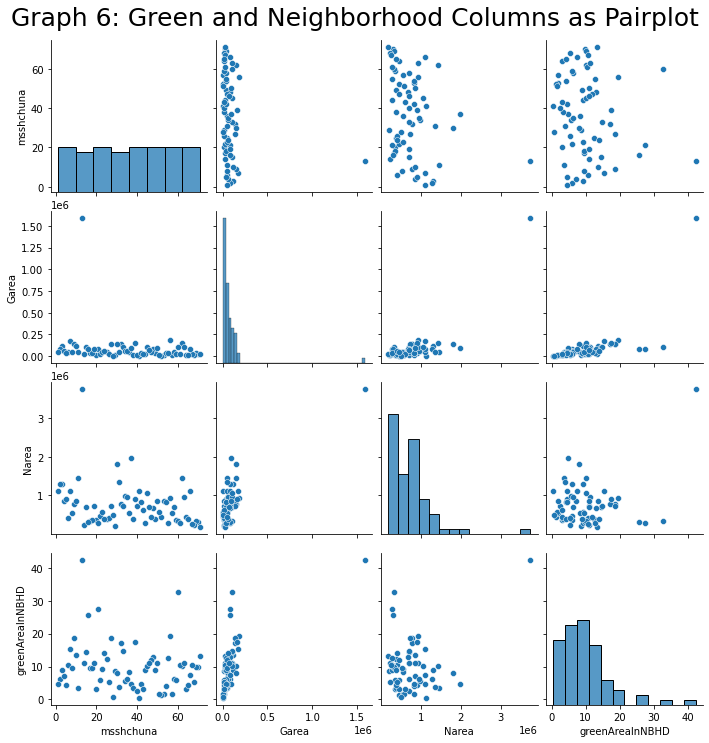

In [48]:
# looking at the data now 
colplot = sns.pairplot(data=AreaStat) # plotint the series as pairplot
colplot.fig.suptitle(
  "Graph 6: Green and Neighborhood Columns as Pairplot", # title text
    verticalalignment='top', y = 1.03, fontsize = 25) #Title location
colplot.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\AreaStatcol.png', dpi=150 )   # save

## Geo work on sales 

### checking on which neighborhood each sale happened 

##### Spatial Join geo_sales and  NBHD by what neighborhood contains what geo_sales

In [49]:
geo_salesNBHD = gpd.sjoin(NBHD,geo_sales, how = 'inner', op = 'contains') # for each sale - what neighborhood contains it

In [50]:
geo_salesNBHD

,oidshchuna,msshchuna,dateimport,ShapeArea,shemshchun,UniqueId,geometry,index_right,Deals_DealAmount,Deals_YearBuilt,Assets_BuildingFloors,Assets_FloorNo,Assets_AssetArea,pricepermeter,Year
0,1.0,3.0,14/10/2020 04:02:01,1.307955e+06,אזור שדה דב,511-1,"POLYGON ((180194.786 670106.559, 180194.277 67...",35295,9703570.0,0.0,NaN,NaN,1000.0,9703.570000,2016
0,1.0,3.0,14/10/2020 04:02:01,1.307955e+06,אזור שדה דב,511-1,"POLYGON ((180194.786 670106.559, 180194.277 67...",35474,8150000.0,0.0,NaN,NaN,1000.0,8150.000000,2016
0,1.0,3.0,14/10/2020 04:02:01,1.307955e+06,אזור שדה דב,511-1,"POLYGON ((180194.786 670106.559, 180194.277 67...",33798,650000.0,0.0,NaN,NaN,NaN,NaN,2015
0,1.0,3.0,14/10/2020 04:02:01,1.307955e+06,אזור שדה דב,511-1,"POLYGON ((180194.786 670106.559, 180194.277 67...",33799,3045400.0,0.0,NaN,NaN,NaN,NaN,2016
0,1.0,3.0,14/10/2020 04:02:01,1.307955e+06,אזור שדה דב,511-1,"POLYGON ((180194.786 670106.559, 180194.277 67...",33800,4560001.0,0.0,NaN,NaN,1919.0,2376.238145,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71.0,46.0,14/10/2020 04:02:01,6.979523e+05,צהלון ושיכוני חסכון,511-71,"POLYGON ((177059.689 660663.313, 177048.956 66...",1107,890000.0,1960.0,4.0,שלישית,47.0,18936.170213,2013
70,71.0,46.0,14/10/2020 04:02:01,6.979523e+05,צהלון ושיכוני חסכון,511-71,"POLYGON ((177059.689 660663.313, 177048.956 66...",1108,500000.0,1960.0,4.0,שניה,47.0,10638.297872,2013
70,71.0,46.0,14/10/2020 04:02:01,6.979523e+05,צהלון ושיכוני חסכון,511-71,"POLYGON ((177059.689 660663.313, 177048.956 66...",982,775000.0,1958.0,4.0,שלישית,47.0,16489.361702,2012
70,71.0,46.0,14/10/2020 04:02:01,6.979523e+05,צהלון ושיכוני חסכון,511-71,"POLYGON ((177059.689 660663.313, 177048.956 66...",979,772500.0,1970.0,4.0,רביעית,47.0,16436.170213,2012


### mean price by neighborhoods

In [51]:
# grouping the data by msshchuna to get mean price in each neighborhoods
meanPricePerNBHD = geo_salesNBHD.groupby('msshchuna').mean('pricepermeter')  
meanPricePerNBHD

,oidshchuna,ShapeArea,index_right,Deals_DealAmount,Deals_YearBuilt,Assets_BuildingFloors,Assets_AssetArea,pricepermeter,Year
msshchuna,,,,,,,,,
1.0,37.0,1.115628e+06,37228.000000,3.842528e+06,1697.995495,11.028986,695.288462,28950.188073,2013.854406
2.0,2.0,1.288925e+06,36404.384804,3.779954e+06,1623.898010,9.873817,371.630744,25958.071932,2013.786765
3.0,1.0,1.307955e+06,33705.166667,5.271578e+06,0.000000,NaN,1803.250000,5476.433518,2015.500000
4.0,9.0,8.679529e+05,33051.093230,3.407415e+06,1916.223776,8.320724,229.279118,27754.657071,2014.025527
5.0,10.0,9.167206e+05,30838.853081,3.420603e+06,1868.902439,7.668966,273.263833,27339.634417,2014.265403
...,...,...,...,...,...,...,...,...,...
67.0,48.0,2.533470e+05,4738.406326,1.802401e+06,2002.481994,5.761905,116.718973,16909.657372,2014.024331
68.0,47.0,2.398694e+05,6746.452229,1.330586e+06,1964.101911,8.828947,67.695705,19951.860230,2014.178344
69.0,46.0,3.307963e+05,4523.658654,1.153634e+06,1937.951923,5.554217,66.672596,18045.484148,2014.177885


### merging the meanPricePerNBHD with the AreaStat data
#### I want total green area and mean priceper meter in each neighborhood on the same dataset

In [52]:
NBHDpriceStat= AreaStat.merge(meanPricePerNBHD, on = 'msshchuna') #

### plotting - mean price per neighborhood

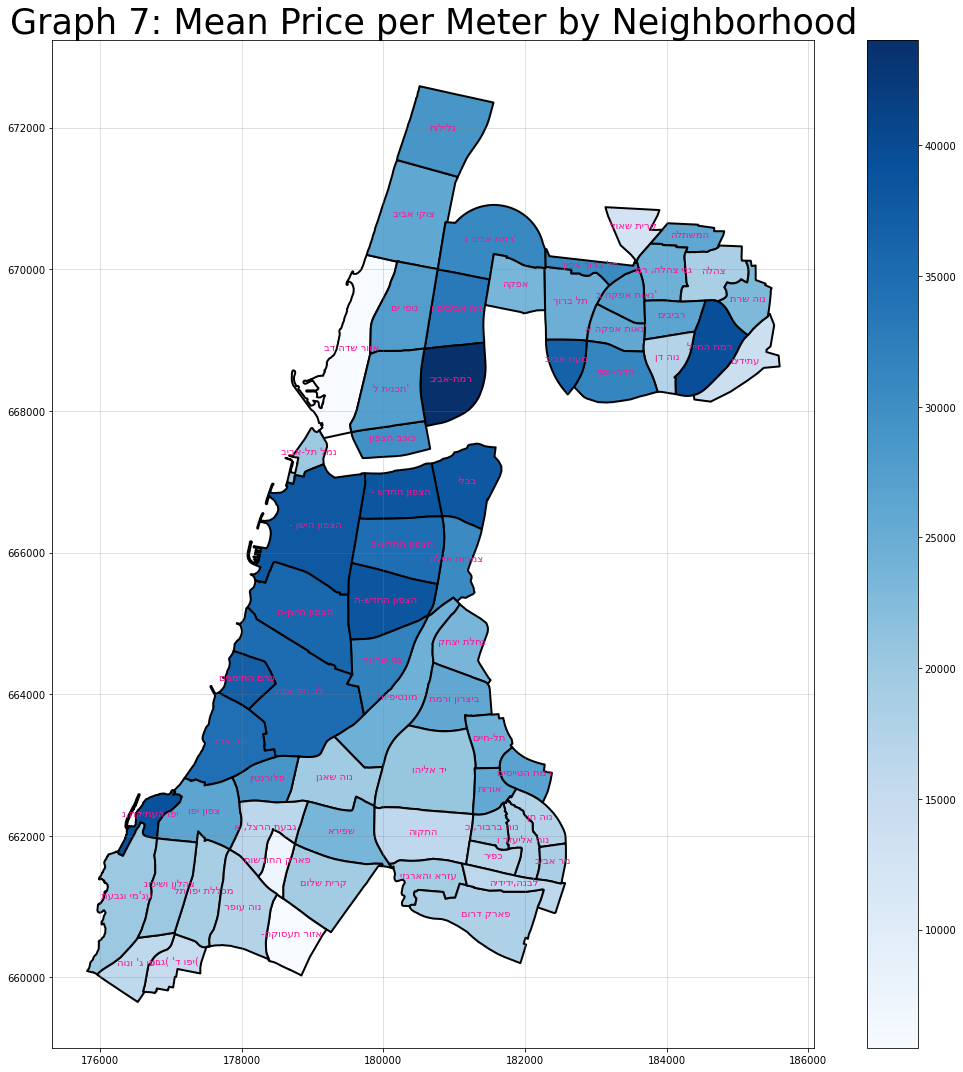

In [53]:
fig, ax = plt.subplots(1, figsize = (15,15)) #  subplots = 1 on 1 matrix of axes, figsize 15* 15, call axis ax 

#Adding neighborhood name to the plot 
NBHDpriceStat.apply(lambda x: ax.annotate(text=x.shemshchun[11::-1], xy=x.geometry.centroid.coords[0], ha='center', fontsize=10, color= 'deeppink'),axis=1)

#Plot NBHDpriceStat
NBHDpriceStat.plot(ax= ax, 
              column = 'pricepermeter', 
              cmap = 'Blues',  edgecolor='black', 
              legend = True, linewidth=2)


#setting a title and textsize
ax.set_title('Graph 7: Mean Price per Meter by Neighborhood', size = 35)

# creating a grid
plt.grid( color='grey',  alpha=0.3)

# fitting the page 
plt.tight_layout()

#save
fig.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\Mean_price_per_meter_neighborhood.png', dpi=150)



##  Prices vs green areas - getting to the question 

### first we will see if there is connection between prices and amount of green areas in the neighborhood

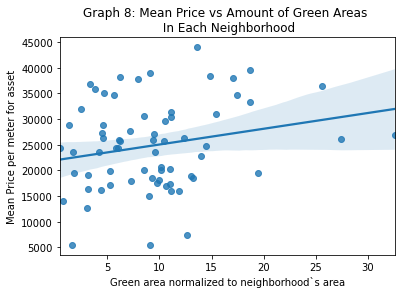

In [54]:
# scatterplotting 'pricepermeter' vs 'greenAreaInNBHD' 
# seeing the mean price in each neighborhood vs the amount of green areas in it 
# plotting it with linear regression model fit.
ploti = sns.regplot(x="greenAreaInNBHD", y="pricepermeter", data=NBHDpriceStat) # plotting the data
ploti.set(
    title ="Graph 8: Mean Price vs Amount of Green Areas \n In Each Neighborhood",
    xlabel= 'Green area normalized to neighborhood`s area',
    ylabel='Mean Price per meter for asset') # set titles 
#save fig as png 
ploti.figure.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\Mean_price_vs_Green_area.png', dpi=150 ) 

In [55]:
# check correlation between those two series
print(NBHDpriceStat.pricepermeter.corr(NBHDpriceStat.greenAreaInNBHD))

0.2238108928686306


### Change in price vs green areas

In [56]:
# getting mean prices each year, each neighborhood
NBHDPriceYear = geo_salesNBHD.groupby(['msshchuna','Year'],as_index=False).mean('pricepermeter')

In [57]:
# for each neighborhood, getting the diffrence between the max and min prices (max and min as year mean)
diff = NBHDPriceYear.groupby(['msshchuna']).agg({"pricepermeter": lambda x: x.max() - x.min()}).reset_index()
# renaming the "pricepermeter" column so diffrence will be known 
diff = diff.rename(columns = {'pricepermeter': 'PriceDifference'})

In [58]:
# merging it with the green area data now we have price diffrence and sum of green area
diffGreenPrice = AreaStat.merge(diff, on = 'msshchuna')

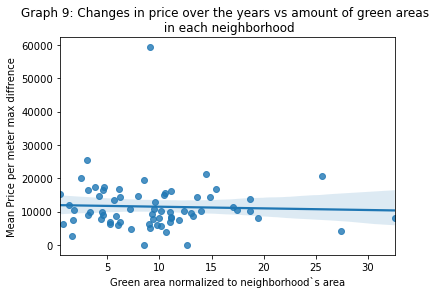

In [59]:
# plotting "greenAreaInNBHD" vs"PriceDifference"
# seeing the PriceDifference in each neighborhood vs the amount of green areas in it 
# plotting it with linear regression model fit.
ploti = sns.regplot(x="greenAreaInNBHD", y="PriceDifference", data=diffGreenPrice) # plotting the data
ploti.set(
    title ="Graph 9: Changes in price over the years vs amount of green areas \n in each neighborhood",
    xlabel= 'Green area normalized to neighborhood`s area',
    ylabel='Mean Price per meter max diffrence' ) # set titles 
#save fig as png 
ploti.figure.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\diffrence_price_vs_Green_area.png',
                      dpi=150 ) 

In [60]:
# check correlation between those two series
print(diffGreenPrice.greenAreaInNBHD.corr(diffGreenPrice.PriceDifference))

-0.03963356385820139


### seems to be no real correlation betwen the two

## Pre Machine learning

### getting the data ready 

### Trying to improve machine learning by looking at the asset`s  floor number 

#### Arranging the floor data - from hebrew to int

#### Arrenging the data

In [61]:
#### getting the floors into a separate dataframe 
floors = geo_salesNBHD.Assets_FloorNo 

In [62]:
countfloors = floors.value_counts() # how many values are carring  each unique string in my new dataframe 
len (countfloors) # we have 385 uniqe values on this list so I wont manipulate all the data

385

In [63]:
countfloors.head(10) # see what are the top values so I will work on them 

שניה      4824
ראשונה    4788
שלישית    3877
רביעית    2198
קרקע      1971
חמישית    1138
שישית      879
שביעית     670
שמינית     574
תשיעית     354
Name: Assets_FloorNo, dtype: int64

In [64]:
 # I dont want to take a risk on the data itself so I will work on a deep copy
geo_salesNums = geo_salesNBHD.copy(deep=True)

In [65]:
# creating a converting dictionary for floors -1 to 10
floormap = {'שניה': '2', 'ראשונה': '1', 'שלישית': '3', 'רביעית': '4', 'קרקע': '0', 'חמישית': '5', 'שישית': '6', 'שביעית': '7',
'שמינית': '8', 'תשיעית': '9', 'מרתף': '-1', 'עשירית': '10','עשירית': '10'}
# using the map 
# using na_action = 'ignore' so I will only get values which I know I converted and are numbers 
geo_salesNums['Assets_FloorNo'] = geo_salesNums.Assets_FloorNo.map(floormap, na_action='ignore')

In [66]:
geo_salesNums

,oidshchuna,msshchuna,dateimport,ShapeArea,shemshchun,UniqueId,geometry,index_right,Deals_DealAmount,Deals_YearBuilt,Assets_BuildingFloors,Assets_FloorNo,Assets_AssetArea,pricepermeter,Year
0,1.0,3.0,14/10/2020 04:02:01,1.307955e+06,אזור שדה דב,511-1,"POLYGON ((180194.786 670106.559, 180194.277 67...",35295,9703570.0,0.0,NaN,NaN,1000.0,9703.570000,2016
0,1.0,3.0,14/10/2020 04:02:01,1.307955e+06,אזור שדה דב,511-1,"POLYGON ((180194.786 670106.559, 180194.277 67...",35474,8150000.0,0.0,NaN,NaN,1000.0,8150.000000,2016
0,1.0,3.0,14/10/2020 04:02:01,1.307955e+06,אזור שדה דב,511-1,"POLYGON ((180194.786 670106.559, 180194.277 67...",33798,650000.0,0.0,NaN,NaN,NaN,NaN,2015
0,1.0,3.0,14/10/2020 04:02:01,1.307955e+06,אזור שדה דב,511-1,"POLYGON ((180194.786 670106.559, 180194.277 67...",33799,3045400.0,0.0,NaN,NaN,NaN,NaN,2016
0,1.0,3.0,14/10/2020 04:02:01,1.307955e+06,אזור שדה דב,511-1,"POLYGON ((180194.786 670106.559, 180194.277 67...",33800,4560001.0,0.0,NaN,NaN,1919.0,2376.238145,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71.0,46.0,14/10/2020 04:02:01,6.979523e+05,צהלון ושיכוני חסכון,511-71,"POLYGON ((177059.689 660663.313, 177048.956 66...",1107,890000.0,1960.0,4.0,3,47.0,18936.170213,2013
70,71.0,46.0,14/10/2020 04:02:01,6.979523e+05,צהלון ושיכוני חסכון,511-71,"POLYGON ((177059.689 660663.313, 177048.956 66...",1108,500000.0,1960.0,4.0,2,47.0,10638.297872,2013
70,71.0,46.0,14/10/2020 04:02:01,6.979523e+05,צהלון ושיכוני חסכון,511-71,"POLYGON ((177059.689 660663.313, 177048.956 66...",982,775000.0,1958.0,4.0,3,47.0,16489.361702,2012
70,71.0,46.0,14/10/2020 04:02:01,6.979523e+05,צהלון ושיכוני חסכון,511-71,"POLYGON ((177059.689 660663.313, 177048.956 66...",979,772500.0,1970.0,4.0,4,47.0,16436.170213,2012


#### merging and working on the entire set of data

In [67]:
#merging this new geo_salesNums which contains floor number as int with AreaStat
#merging the data sets green and sales with the neighborhood stat
# this is so we can see for each sale what was the green area in its NBHD along the sale details 
GreenandPrice= geo_salesNums.merge(AreaStat, on = 'msshchuna', how= 'left')

### Working on the data 

#### Creating a dataframe with only he relevent columns for all of the machine learnings 

In [68]:
GreenandPriceN= GreenandPrice[[
               'Assets_BuildingFloors',
               'Deals_YearBuilt',
               'Assets_AssetArea',
                  'greenAreaInNBHD', 
                    'Year', 
                       'pricepermeter','Assets_FloorNo']]

### null values

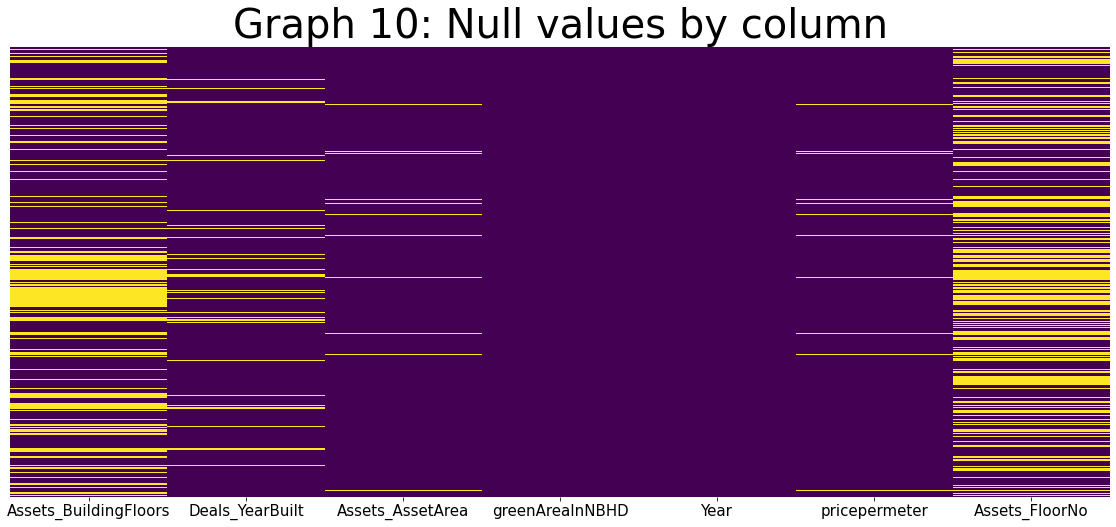

In [69]:
#using seaborn to plot nulll values in each column
fig, ax = plt.subplots() # creating fig and subplot
fig.set_size_inches(19.7,8.27) # setting fig size 
nullplt = sns.heatmap(GreenandPriceN.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax) # creating an sns graph
nullplt.tick_params(labelsize=15) # setting labels size 
nullplt.axes.set_title( "Graph 10: Null values by column", fontsize=40) # setting a title 
nullplt.figure.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\Nullplot.png', dpi=150 ) # saving

#### we still have a lot have null values in the relevent columns so  I will drop those since I still have a lot of data 

In [70]:
GreenandPriceN = GreenandPriceN.dropna() # reasaving 

In [71]:
GreenandPriceN.count() # still have 17709 rows which is a lot 

Assets_BuildingFloors    17709
Deals_YearBuilt          17709
Assets_AssetArea         17709
greenAreaInNBHD          17709
Year                     17709
pricepermeter            17709
Assets_FloorNo           17709
dtype: int64

#### looking at the disturbition of the pricepermeter data

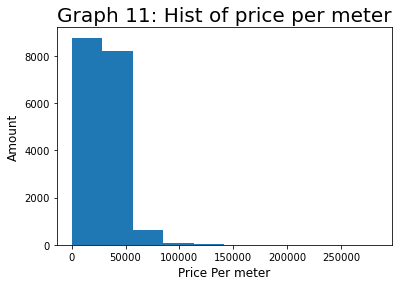

In [72]:
plt.hist(GreenandPriceN.pricepermeter) # creating an hist graph of pricepermeter
plt.title("Graph 11: Hist of price per meter", size = 20) # set title 
plt.ylabel('Amount', size = 12) # set y label
plt.xlabel('Price Per meter', size = 12) # set x label 
plt.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\hist_pricepermeter.png', dpi=150) # save fig

#### dropping the rare really high values 

In [73]:
GreenandPriceN = GreenandPriceN[GreenandPriceN.pricepermeter < 150000] 
GreenandPriceN.count() # still have 17695 rows which is a lot 

Assets_BuildingFloors    17695
Deals_YearBuilt          17695
Assets_AssetArea         17695
greenAreaInNBHD          17695
Year                     17695
pricepermeter            17695
Assets_FloorNo           17695
dtype: int64

### Save GreenPricN into a csv file

In [74]:
GreenandPriceN.to_csv("GreenandPriceN.csv")

## machine learning

### first machine learning - with green area in the neighborhood but without assets floor number

#### creating two sets of data

In [264]:
X = GreenandPriceN[[
               'Assets_BuildingFloors',
               'Deals_YearBuilt',
               'Assets_AssetArea',
                  'greenAreaInNBHD', 
                    'Year' 
                    ]] # this will be used for predicting 

In [265]:
Y = GreenandPriceN['pricepermeter'] # this we will try to predict 

#### spliting it into train and test data those which the model will train on and those which will be used for testing how the training went

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#### Fit regression model

In [267]:
lm = LinearRegression()

In [268]:
lm.fit(X_train,y_train)

LinearRegression()

In [269]:
# those are the coefficent values 
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Linear coef.'])
coeff_df

,Linear coef.
Assets_BuildingFloors,-98.515342
Deals_YearBuilt,0.914457
Assets_AssetArea,-27.101921
greenAreaInNBHD,-157.077409
Year,2077.169062


#### Predicting the prices using our X_test data

In [270]:
predicted_price = lm.predict(X_test)

#### looking at the results

##### plotting the y_test data and the predicted_price to see how correct was the machine learning

In [271]:
preforplot= pd.DataFrame({'test': y_test, 'predict':predicted_price }) # getting the data into a dataframe for sns plot

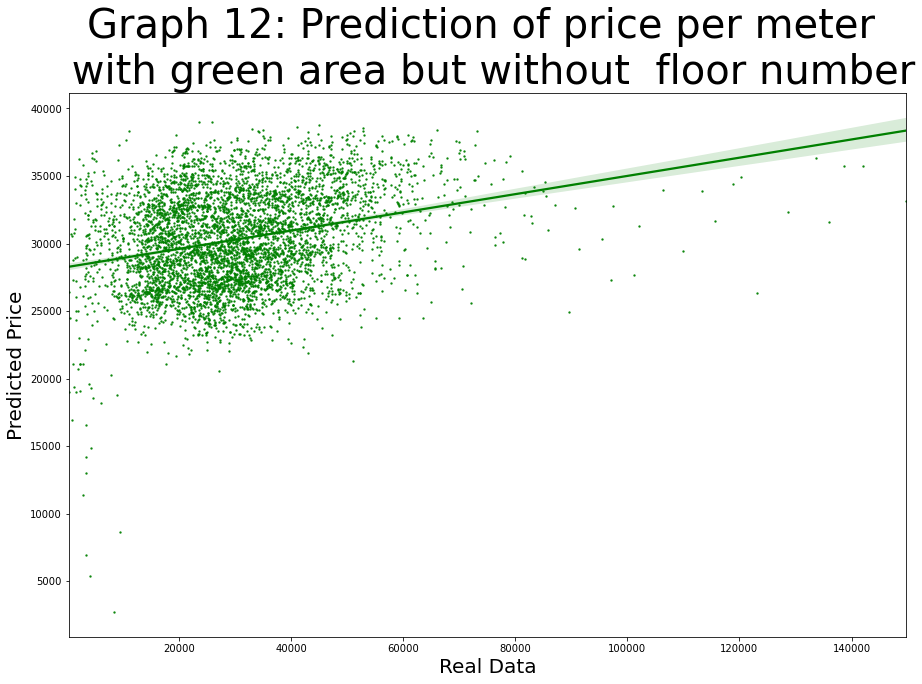

In [272]:
fig, ax = plt.subplots() # set figure and axes 
fig.set_size_inches(15,10) # figure size 

# plotting the data and setting marker and point size 
ploti = sns.regplot(x="test", y="predict", data=preforplot,ax= ax, scatter_kws={'s':2}, marker='o', color='green') 

ploti.tick_params(labelsize=10)  # tick size
ploti.set_ylabel('Predicted Price', size = 20) # set y label and size 
ploti.set_xlabel ('Real Data', size = 20 ) # set x label and size 
# title and textsize 
ploti.axes.set_title("Graph 12: Prediction of price per meter \n with green area but without  floor number", size = 40)
#save fig as png 
ploti.figure.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\Prediction_price_per_meter_withgreen.png', dpi=150 ) 

##### Setting x and y  limits to focous on the area where most of the data is 

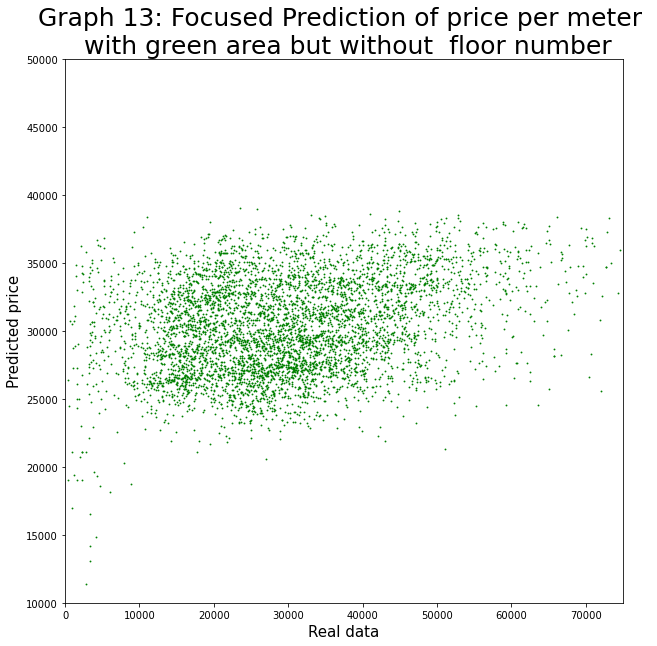

In [273]:
plt.figure(figsize=(10,10)) #  figure size 
plt.scatter(y_test, predicted_price, s=0.7, color='green') # plotting a scatter plot
plt.xlim(-1,75000) # setting x limit
plt.ylim(10000,50000) # setting y limit 
plt.title("Graph 13: Focused Prediction of price per meter \n with green area but without  floor number", size = 25) # setting a title 
plt.xlabel("Real data", size = 15) # x title 
plt.ylabel("Predicted price", size = 15) # y titile 
plt.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\focus_Prediction_price_per_meter_withgreen.png', dpi=150) # save fig

##### computes mean absolute error, a risk metric corresponding to the expected value of the absolute error los

In [274]:
metrics.mean_absolute_error(y_test, predicted_price)

10638.334002091122

#####  the coefficient of determination R^2 of the prediction.

In [275]:
lm.score(X_test,y_test)

0.07542246679113718

##### plotting the diffrence between predicted_price and y_test

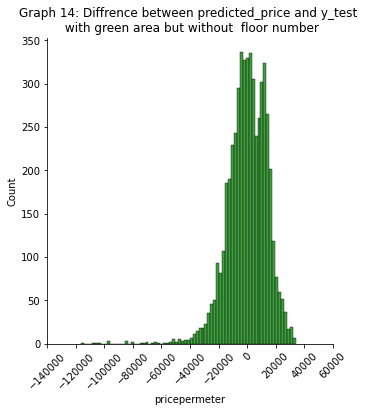

In [276]:
#creating the plot and saving the fig
disploti = sns.displot(predicted_price-y_test, color='green') # ploting a displot of the predicted_price minus y_test
# set title
disploti.set(title= "Graph 14: Diffrence between predicted_price and y_test \n with green area but without  floor number")
# rotate x tick labels
disploti.set_xticklabels(rotation=45)
# save 
disploti.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\diffrence_predicted_price_y_test_withgreen.png', dpi=150 ) 

### second machine learning - without green area in the neighborhood but with assets floor number

#### creating two sets of data

In [277]:
X = GreenandPriceN[[
               'Assets_BuildingFloors',
               'Deals_YearBuilt',
               'Assets_AssetArea',
                    'Year', 
                      'Assets_FloorNo']]  # these data will be used for predicting 

In [278]:
Y = GreenandPriceN['pricepermeter'] # this we will try to predict 

#### spliting it into train and test data those which the model will train on and those which will be used for testing how the training went

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#### Fit regression model

In [280]:
lm = LinearRegression()

In [281]:
lm.fit(X_train,y_train)

LinearRegression()

In [282]:
# those are the coefficent values 
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Linear coef.'])
coeff_df

,Linear coef.
Assets_BuildingFloors,-105.879867
Deals_YearBuilt,0.315933
Assets_AssetArea,-28.877692
Year,2150.100851
Assets_FloorNo,17.532708


#### Predicting the prices using our X_test data

In [283]:
predicted_price = lm.predict(X_test)

#### looking at the results

##### plotting the y_test data and the predicted_price to see how correct was the machine learning

In [284]:
preforplot= pd.DataFrame({'test': y_test, 'predict':predicted_price }) # getting the data into a dataframe for sns plot

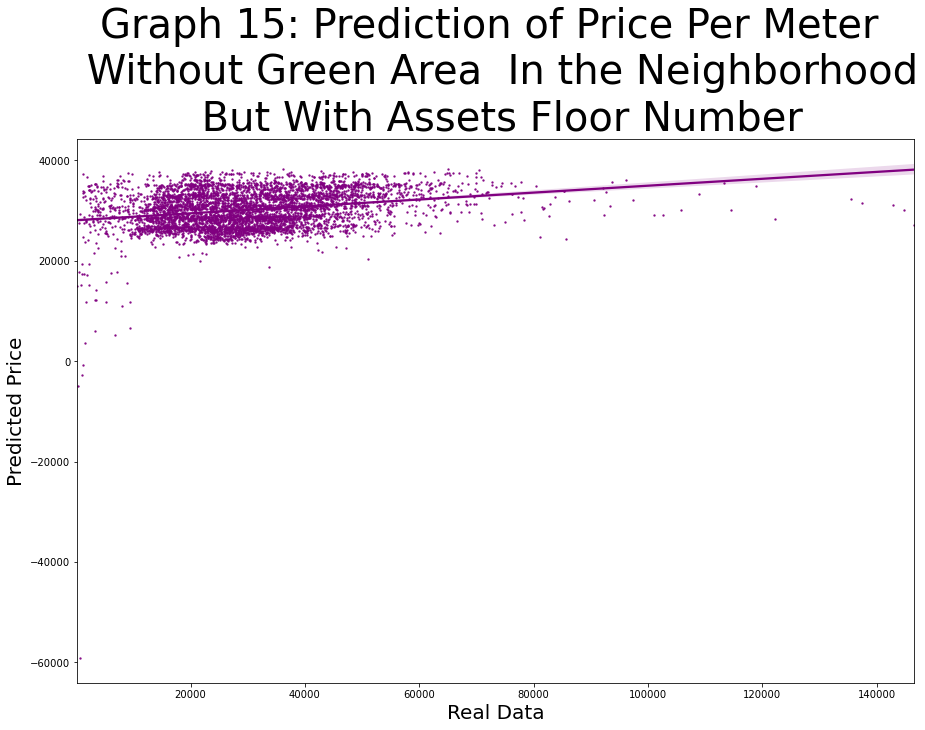

In [285]:
fig, ax = plt.subplots() # setting ax and figure 
fig.set_size_inches(15,10) # fig size 
# plotting the data ans setting marker and point size 
ploti = sns.regplot(x="test", y="predict", data=preforplot,ax= ax, scatter_kws={'s':2}, marker='o',color='purple') 

ploti.tick_params(labelsize=10)  # tick size
ploti.set_ylabel('Predicted Price', size = 20) # set y label and size 
ploti.set_xlabel ('Real Data', size = 20 ) # set x label and size 

# title and size 
ploti.axes.set_title("Graph 15: Prediction of Price Per Meter \n Without Green Area  In the Neighborhood\n But With Assets Floor Number", size = 40)
#save fig as png 
ploti.figure.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\Prediction_price_per_meter_floors.png.png', dpi=150,bbox_inches='tight' ) 

##### setting x and y  limits to focous on the are where most of the data is 

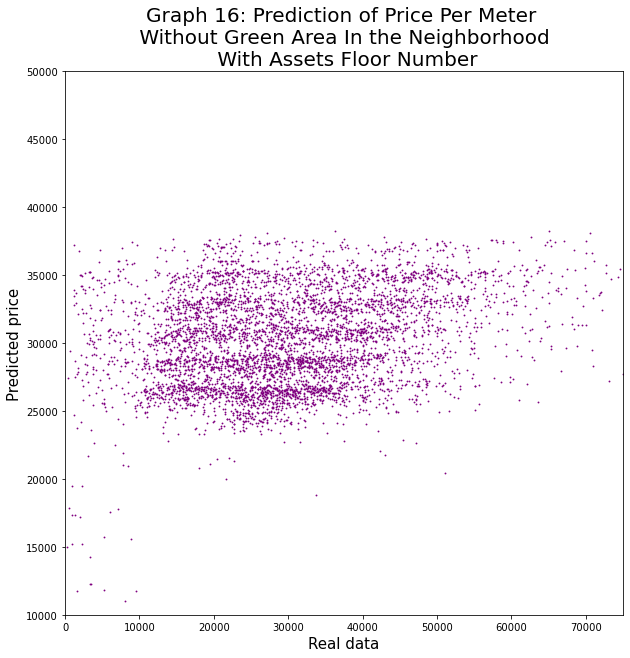

In [286]:
plt.figure(figsize=(10,10)) #  fig size 
plt.scatter(y_test, predicted_price, s=0.7,color='purple') # plotting a scatter plot
plt.xlim(-1,75000) # setting x limit
plt.ylim(10000,50000) # setting y limit 
plt.title("Graph 16: Prediction of Price Per Meter \n Without Green Area In the Neighborhood \n With Assets Floor Number", size = 20) # setting a title 
plt.xlabel("Real data", size = 15 ) # x title 
plt.ylabel("Predicted price", size = 15 ) # y titile 
plt.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\Focus_Prediction_price_per_meter_floors.png', dpi=150,bbox_inches='tight') # save fig

##### computes mean absolute error, a risk metric corresponding to the expected value of the absolute error los

In [287]:
metrics.mean_absolute_error(y_test, predicted_price)

10595.980360219133

#####  the coefficient of determination R^2 of the prediction.

In [288]:
lm.score(X_test,y_test)

0.06630025807654816

##### plotting the diffrence between predicted_price and y_test

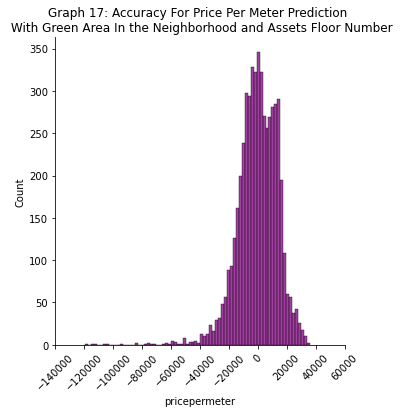

In [289]:
disploti = sns.displot(predicted_price-y_test, color='purple') # ploting a displot of the diffrence
# setting a title 
disploti.set(title= "Graph 17: Accuracy For Price Per Meter Prediction \n With Green Area In the Neighborhood and Assets Floor Number")
# rotatin the x tick labels 
disploti.set_xticklabels(rotation=45)
# save 
disploti.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\diffrence_predicted_price_y_test_withfloor.png', dpi=150 ) 

### creating a 2 dimensions numpy array 

In [290]:
arrayX = X_train.Year.to_numpy() # converting years from series to numpy array 

In [291]:
twoarrayX = arrayX.reshape(2, int(len(arrayX)/2)) # reshpint as metrix

In [292]:
twoarrayX.ndim # checking how many dimentions in the array

2

In [293]:
type(twoarrayX) # checking type 

numpy.ndarray

## Third machine learning - without green area in the neighborhood and without assets` floor number

#### creating two sets of data

In [294]:
X = GreenandPriceN[[
               'Assets_BuildingFloors',
               'Deals_YearBuilt',
               'Assets_AssetArea',
                    'Year', 
                       ]] # those will be used for predicting 

In [295]:
Y = GreenandPriceN['pricepermeter'] # this we will attenpt to predict

#### spliting it into train and test data those which the model will train on and those which will be used for testing how the training went

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#### Fit regression model

In [297]:
lm = LinearRegression()

In [298]:
lm.fit(X_train,y_train)

LinearRegression()

In [299]:
# those are the coefficent values 
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Linear coef.'])
coeff_df

,Linear coef.
Assets_BuildingFloors,-95.225869
Deals_YearBuilt,0.177882
Assets_AssetArea,-29.045772
Year,2148.229241


#### Predicting the prices using our X_test data

In [300]:
predicted_price = lm.predict(X_test)

#### looking at the results

##### plotting the y_test data and the predicted_price to see how correct was the machine learning

In [301]:
preforplot= pd.DataFrame({'test': y_test, 'predict':predicted_price }) # getting the data into a dataframe for sns plot

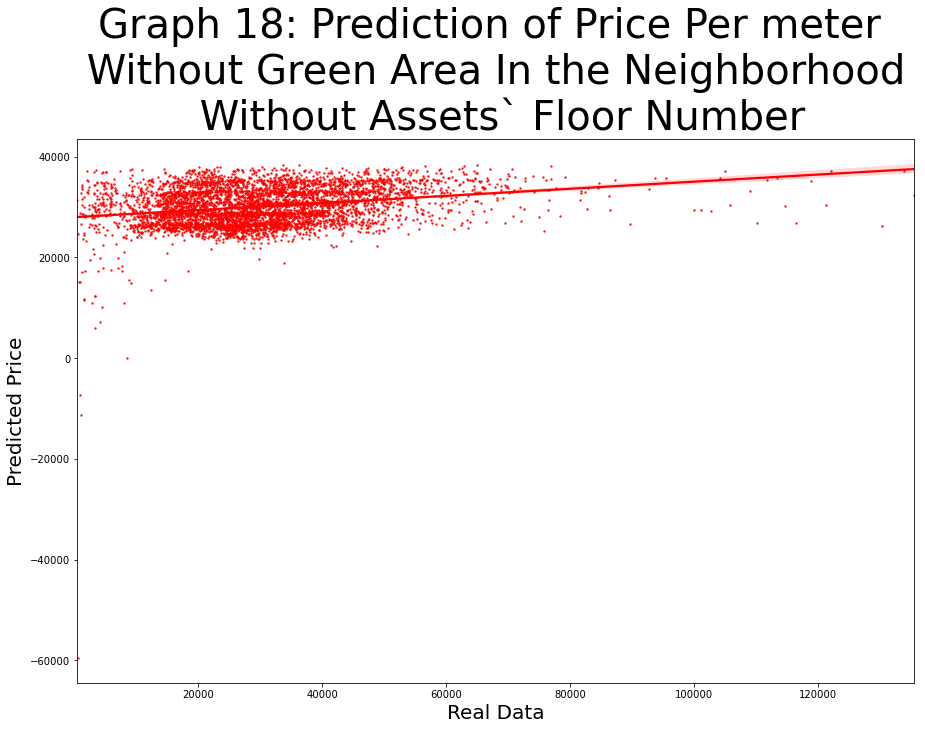

In [302]:
fig, ax = plt.subplots() # setting figure and axes 
fig.set_size_inches(15,10) # figure size 
# plotting the data ans setting marker and point size 
ploti = sns.regplot(x="test", y="predict", data=preforplot,ax= ax, scatter_kws={'s':2}, marker='o', color='red') 
ploti.tick_params(labelsize=10)  # tick size
ploti.set_ylabel('Predicted Price', size = 20) # set y label and size 
ploti.set_xlabel ('Real Data', size = 20 ) # set x label and size 
# title and size 
ploti.axes.set_title("Graph 18: Prediction of Price Per meter \n Without Green Area In the Neighborhood \n Without Assets` Floor Number", size = 40)
#save fig as png 
ploti.figure.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\Prediction_price_per_meter.png', dpi=150 ,bbox_inches='tight') 

##### setting x and y  limits to focous on the majority of the data 

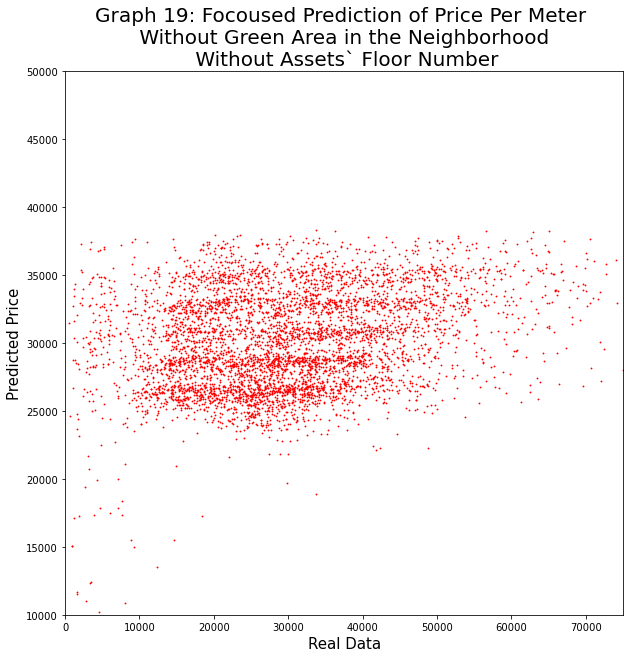

In [303]:
plt.figure(figsize=(10,10)) #  figure size 
plt.scatter(y_test, predicted_price, s=0.7, color='red') # plotting a scatter plot
plt.xlim(-1,75000) # setting x limit
plt.ylim(10000,50000) # setting y limit 
plt.title("Graph 19: Focoused Prediction of Price Per Meter \n Without Green Area in the Neighborhood \n Without Assets` Floor Number", size = 20) # setting a title 
plt.xlabel("Real Data", size = 15) # x title 
plt.ylabel("Predicted Price", size = 15 ) # y titile 
# saving
plt.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\focus_Prediction_price_per_meter.png', dpi=150,bbox_inches='tight') # save fig

##### computes mean absolute error, a risk metric corresponding to the expected value of the absolute error los

In [304]:
metrics.mean_absolute_error(y_test, predicted_price)

10545.212760853825

#####  the coefficient of determination R^2 of the prediction.

In [305]:
lm.score(X_test,y_test)

0.06798854836834367

##### plotting the diffrence between predicted_price and y_test

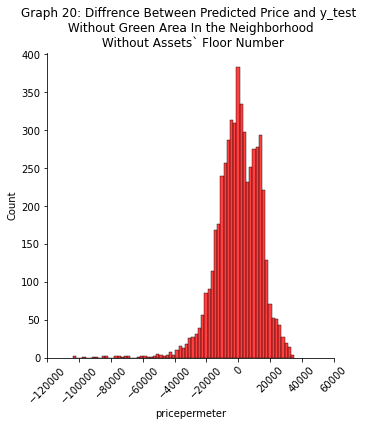

In [306]:
disploti = sns.displot(predicted_price-y_test, color='red') # plotting a displot of diffrence between predited and real data
# set title 
disploti.set(title= "Graph 20: Diffrence Between Predicted Price and y_test \n Without Green Area In the Neighborhood \n Without Assets` Floor Number")
# rotating x tick labels 
disploti.set_xticklabels(rotation=45)
# saving
disploti.savefig(r'C:\Users\doron\OneDrive\שולחן העבודה\Uni\final_ex_ds\outputs\diffrence_predicted_price_y_test.png', dpi=150 ) 
